<a href="https://colab.research.google.com/github/Aniyar/Kazakh_NLP/blob/main/TensorFlow%20In%20Practice/Course%203%20-%20NLP/Course%203%20-%20Week%204%20-%20Lesson%202%20-%20Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

<a href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%203%20-%20NLP/Course%203%20-%20Week%204%20-%20Lesson%202%20-%20Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

In [3]:
tokenizer = Tokenizer()

with open ('abay.txt', 'r', encoding="utf8") as fp:
  data = fp.read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)


{'бір': 1, 'жоқ': 2, 'деп': 3, 'да': 4, 'бар': 5, 'мен': 6, 'ақ': 7, 'сөз': 8, 'ма': 9, 'жүр': 10, 'де': 11, 'көп': 12, 'ол': 13, 'мал': 14, 'не': 15, 'алмай': 16, 'өз': 17, 'күн': 18, 'жас': 19, 'сен': 20, 'кім': 21, 'бәрі': 22, 'екен': 23, 'ақыл': 24, 'көңілім': 25, 'адам': 26, 'болса': 27, 'жан': 28, 'қара': 29, 'көңіл': 30, 'емес': 31, 'бұл': 32, 'әр': 33, 'соң': 34, 'жақсы': 35, 'ай': 36, 'қыз': 37, 'үшін': 38, 'жұрт': 39, 'ой': 40, 'қой': 41, 'бай': 42, 'жүрек': 43, 'қайда': 44, 'өмір': 45, 'екі': 46, 'біреу': 47, 'құр': 48, 'боп': 49, 'ел': 50, 'пен': 51, 'өткен': 52, 'өзі': 53, 'қызық': 54, 'бе': 55, 'қылып': 56, 'сол': 57, 'аз': 58, 'күнде': 59, 'бірі': 60, 'жер': 61, 'сап': 62, 'ер': 63, 'ме': 64, 'бас': 65, 'сөзді': 66, 'қып': 67, '—': 68, 'өлең': 69, 'оны': 70, 'деген': 71, 'енді': 72, 'та': 73, 'қайғы': 74, 'қу': 75, 'о': 76, 'дос': 77, 'көк': 78, 'сөзін': 79, 'алып': 80, 'осы': 81, 'қызыл': 82, 'ғой': 83, 'бала': 84, 'болған': 85, 'алды': 86, 'ескі': 87, 'пайда': 88, 'кер

In [4]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

In [5]:
print(xs[6])

[   0    0    0    0    0 1491  778   63]


In [6]:
print(ys[6])

[0. 0. 0. ... 0. 0. 0.]


In [7]:
print(xs[5])
print(ys[5])

[   0    0    0    0    0    0 1491  778]
[0. 0. 0. ... 0. 0. 0.]


In [8]:
print(tokenizer.word_index)

{'бір': 1, 'жоқ': 2, 'деп': 3, 'да': 4, 'бар': 5, 'мен': 6, 'ақ': 7, 'сөз': 8, 'ма': 9, 'жүр': 10, 'де': 11, 'көп': 12, 'ол': 13, 'мал': 14, 'не': 15, 'алмай': 16, 'өз': 17, 'күн': 18, 'жас': 19, 'сен': 20, 'кім': 21, 'бәрі': 22, 'екен': 23, 'ақыл': 24, 'көңілім': 25, 'адам': 26, 'болса': 27, 'жан': 28, 'қара': 29, 'көңіл': 30, 'емес': 31, 'бұл': 32, 'әр': 33, 'соң': 34, 'жақсы': 35, 'ай': 36, 'қыз': 37, 'үшін': 38, 'жұрт': 39, 'ой': 40, 'қой': 41, 'бай': 42, 'жүрек': 43, 'қайда': 44, 'өмір': 45, 'екі': 46, 'біреу': 47, 'құр': 48, 'боп': 49, 'ел': 50, 'пен': 51, 'өткен': 52, 'өзі': 53, 'қызық': 54, 'бе': 55, 'қылып': 56, 'сол': 57, 'аз': 58, 'күнде': 59, 'бірі': 60, 'жер': 61, 'сап': 62, 'ер': 63, 'ме': 64, 'бас': 65, 'сөзді': 66, 'қып': 67, '—': 68, 'өлең': 69, 'оны': 70, 'деген': 71, 'енді': 72, 'та': 73, 'қайғы': 74, 'қу': 75, 'о': 76, 'дос': 77, 'көк': 78, 'сөзін': 79, 'алып': 80, 'осы': 81, 'қызыл': 82, 'ғой': 83, 'бала': 84, 'болған': 85, 'алды': 86, 'ескі': 87, 'пайда': 88, 'кер

In [9]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1)
#print model.summary()
print(model)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
243/243 [==============================] - 12s 17ms/step - loss: 8.3429 - accuracy: 0.0132
Epoch 2/100
243/243 [==============================] - 4s 16ms/step - loss: 7.4061 - accuracy: 0.0266
Epoch 3/100
243/243 [==============================] - 4s 17ms/step - loss: 5.8441 - accuracy: 0.0925
Epoch 4/100
243/243 [==============================] - 4s 16ms/step - loss: 3.6285 - accuracy: 0.2875
Epoch 5/100
243/243 [==============================] - 4s 16ms/step - loss: 1.8678 - accuracy: 0.6152
Epoch 6/100
243/243 [==============================] - 4s 19ms/step - loss: 0.9969 - accuracy: 0.7990
Epoch 7/100
243/243 [==============================] - 4s 16ms/step - loss: 0.6538 - accuracy: 0.8616
Epoch 8/100
243/243 [==============================] - 4s 16ms/step - loss: 0.5340 - accuracy: 0.8725
Epoch 9/100
243/243 [==============================] - 4s 16ms/step - loss: 0.4847 - accuracy: 0.8729
Epoch 10/100
243/243 [==============================] - 4s 16ms/step - loss: 0.45

In [10]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

In [21]:
seed_text = "Сұлтан кімнің баласы?"
next_words = 120
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Сұлтан кімнің баласы? шын өңкей бар мың бола ма гүл ме кетпес қызық ау астыртын тұста қылық өу ол алмайсың босқа қыларлық араласшы киген ұқпақ ақ ап салды жиылып қартайып қылғаны бұл дүниенің өзі достық қастық алмай жүр жүзді тыртақтаған тыртақтаған ай арнап тыртақтаған о ойла ау қой орны жоқ аптығарға жоқ қайта жамау бірі құрау денең асы бұйырмас кім майданда алмай құрлы сымбат ғой сыр мен сымбат бар жан мен сымбат сынбаса ма құрлы керек іс бозбалаға ай ай ай жыл ғой аңдығанға некен үміт қой қыз тіл байлайды алма ұлығы ғой күйкентай мен тән менікі деп құрлы көлбек о да бір күні сынар шөлмек ма ма қыс қағып құсымен құмар қой ыржықтап құрлы құрлы о о құрлы құрлы құрлы ем ойла


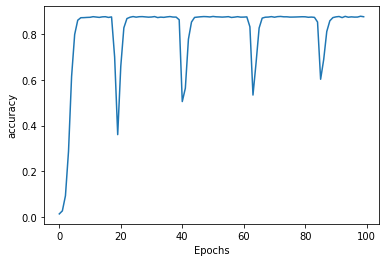

In [11]:
plot_graphs(history, 'accuracy')


In [22]:
txt = seed_text.split()
for i in range(0, len(txt), 4):
  print(" ".join(txt[i:i+4]))

Сұлтан кімнің баласы? шын
өңкей бар мың бола
ма гүл ме кетпес
қызық ау астыртын тұста
қылық өу ол алмайсың
босқа қыларлық араласшы киген
ұқпақ ақ ап салды
жиылып қартайып қылғаны бұл
дүниенің өзі достық қастық
алмай жүр жүзді тыртақтаған
тыртақтаған ай арнап тыртақтаған
о ойла ау қой
орны жоқ аптығарға жоқ
қайта жамау бірі құрау
денең асы бұйырмас кім
майданда алмай құрлы сымбат
ғой сыр мен сымбат
бар жан мен сымбат
сынбаса ма құрлы керек
іс бозбалаға ай ай
ай жыл ғой аңдығанға
некен үміт қой қыз
тіл байлайды алма ұлығы
ғой күйкентай мен тән
менікі деп құрлы көлбек
о да бір күні
сынар шөлмек ма ма
қыс қағып құсымен құмар
қой ыржықтап құрлы құрлы
о о құрлы құрлы
құрлы ем ойла
